In [49]:
%matplotlib inline

from azureml import Workspace, DataTypeIds

ws = Workspace()
events_frame = ws.datasets['microsoft events cleaned2'].to_dataframe()
equity_frame = ws.datasets['msft_equity.csv'].to_dataframe()
news_count_frame = ws.datasets['News count with dates from 2007-01-03 to 2016-12-06.csv'].to_dataframe()

In [50]:
equity_frame = equity_frame[['Date', 'Open', 'High']]

In [51]:
events_frame['Date'] = events_frame['date']
events_frame = events_frame[['Event.type', 'Details', 'Date']]

In [52]:
events_frame

,Event.type,Details,Date
0,Product,Microsoft releases Windows Vista to the genera...,2007-01-30
1,Team,Bill Gates retires as chief software architect...,2008-06-01
2,Competition,"Google launches Google Chrome, a browser that ...",2008-09-02
3,Products,Microsoft launches Windows 7 to the general pu...,2009-10-22
4,Products,"Microsoft unveils Microsoft Bing, a search eng...",2009-05-28
5,Products,"Microsoft launches Microsoft Azure, its foray ...",2010-02-01
6,Competition,Google lifts censorship on issues sensitive to...,2010-03-01
7,Products,"Microsoft announces Windows Phone, a family of...",2010-11-01
8,Acquisitions,Microsoft acquires Skype for $8.5 billion.,2011-05-10
9,Products,"Microsoft launches Microsoft Surface, a series...",2012-10-26


In [53]:
equity_frame = equity_frame.set_index('Date')
events_frame = events_frame.set_index('Date')

In [54]:
combined_frame = equity_frame.join(events_frame)

# n = 0
# def leave_nexts(x):
#     global n
#     print(x)
#     if n > 0 or str(x) != 'nan':
#         if n <= 0:
#             n = 10
#         else:
#             n -= 1
            
#         return x

# combined_frame['Event.type'].map(leave_nexts)

In [55]:
news_count_frame = news_count_frame[['Date', 'Count']].set_index('Date')
combined_frame = combined_frame.join(news_count_frame)

,Open,High,Event.type,Details,Count
Date,,,,,
2007-01-03,29.910,30.2500,NaN,NaN,NaN
2007-01-04,29.700,29.9700,NaN,NaN,NaN
2007-01-05,29.630,29.7500,NaN,NaN,NaN
2007-01-08,29.650,30.1000,NaN,NaN,NaN
2007-01-09,30.000,30.1800,NaN,NaN,NaN
2007-01-10,29.800,29.8900,NaN,NaN,NaN
2007-01-11,29.760,30.7500,NaN,NaN,NaN
2007-01-12,30.650,31.3900,NaN,NaN,NaN
2007-01-16,31.260,31.4500,NaN,NaN,NaN


Microsoft releases Windows Vista to the general public. and was made available for purchase and download from Microsoft's website.


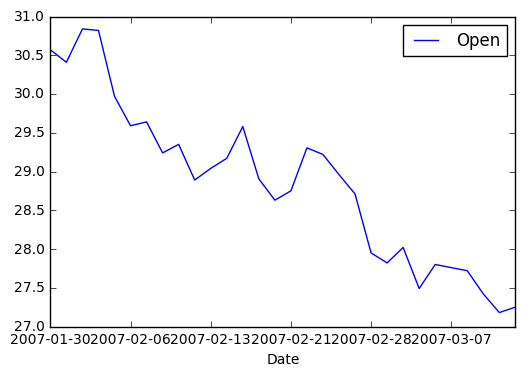

Google launches Google Chrome, a browser that would cut into the web browser operating share of Internet Explorer.


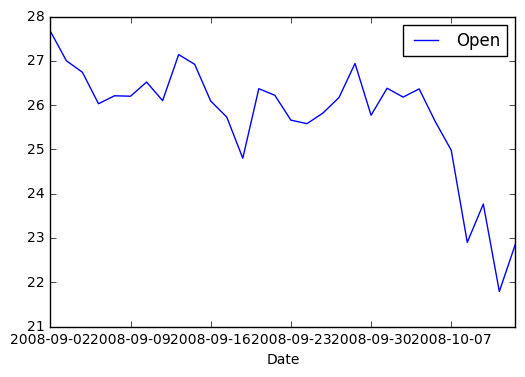

Microsoft unveils Microsoft Bing, a search engine to replace MSN.


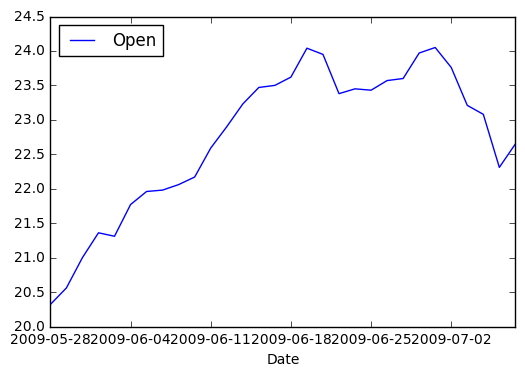

Microsoft launches Windows 7 to the general public.


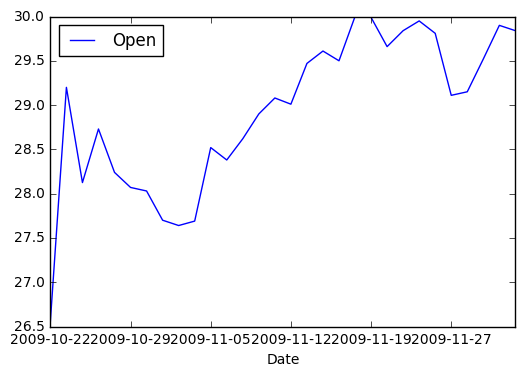

Google lifts censorship on issues sensitive to the Chinese government, and is blocked by China, allowing the way for domination by alternative search engines, including Baidu.


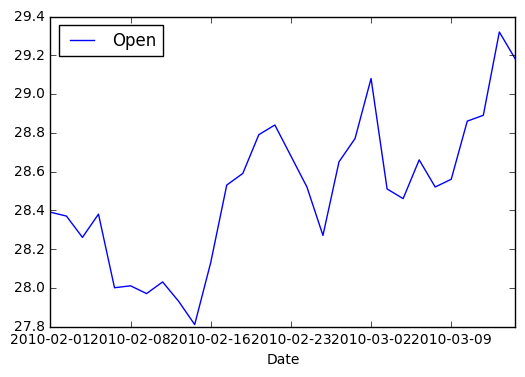

Microsoft announces Windows Phone, a family of mobile operating systems as the replacement successor to Windows Mobile.


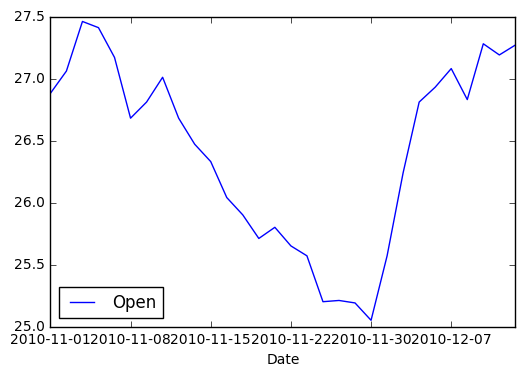

Microsoft acquires Skype for $8.5 billion.


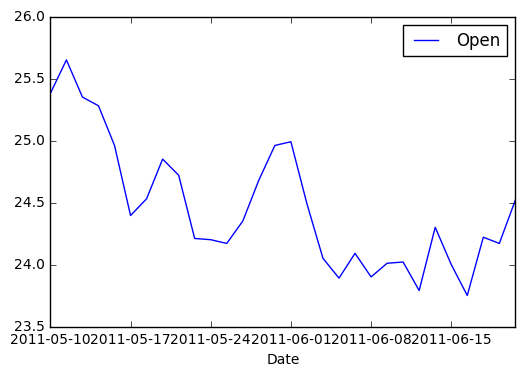

Microsoft launches Microsoft Surface, a series of Windows-based personal computing devices designed and manufactured by Microsoft under its hardware division.


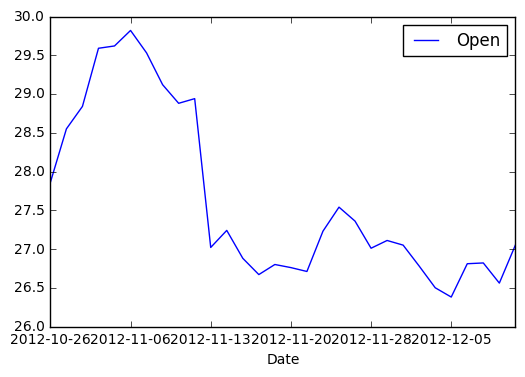

Valve Corporation announces SteamOS, an operating system to compete with Windows.


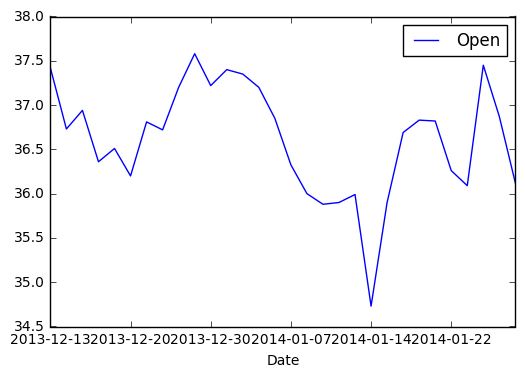

Satya Nadella succeeded Steve Ballmer as CEO of Microsoft.


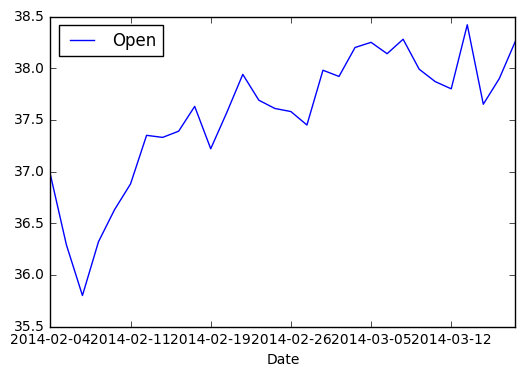

Microsoft announces Cortana (software), an intelligent personal assistant.


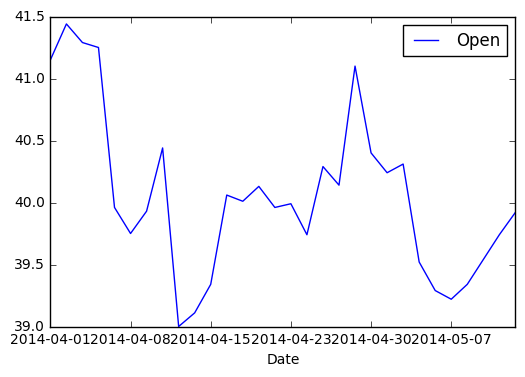

HoloLens, the world's first holographic headset is announced and Microsoft announces that Windows 10 will be a free upgrade for customers with Windows 7, Windows 8.1 or Windows Phone 8.1 (excluding enterprise).


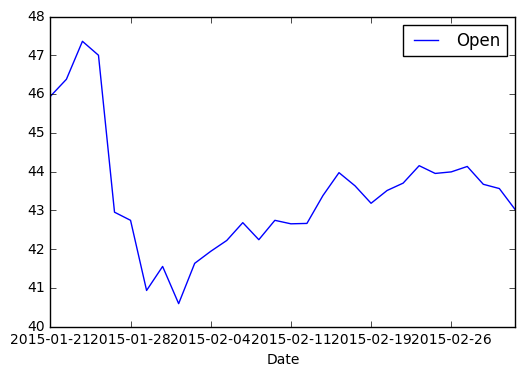

Microsoft releases Windows 10 - what it describes as its "last operating system" - and which acts as an "universal" application architecture across multiple Microsoft product families.


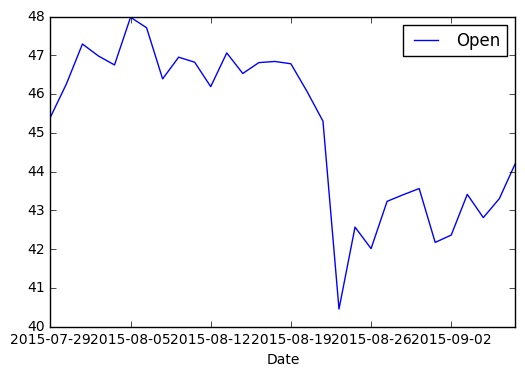

The first flagship Microsoft Store opens in New York City


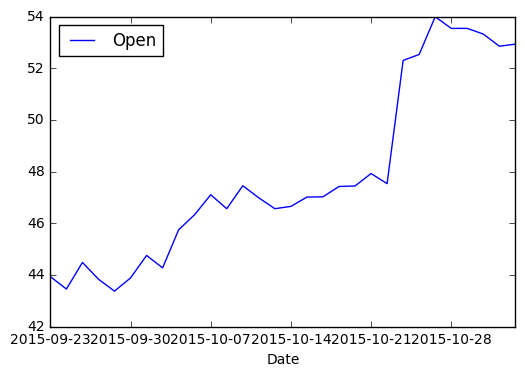

Microsoft, alongside ARM Holdings, Dell, Intel, Cisco Systems, and Princeton University, founded the OpenFog Consortium, to promote interests and development in fog computing.


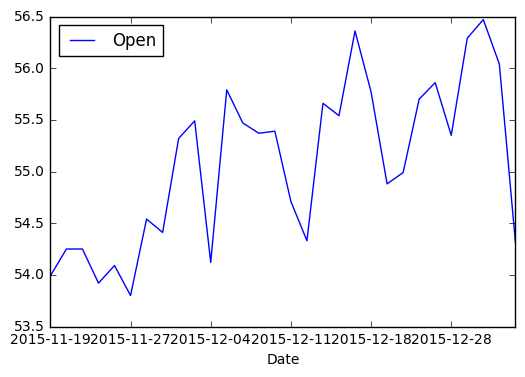

Microsoft announces to buy Xamarin, a company that allows developers to build fully native apps across several platforms from a single shared code base.


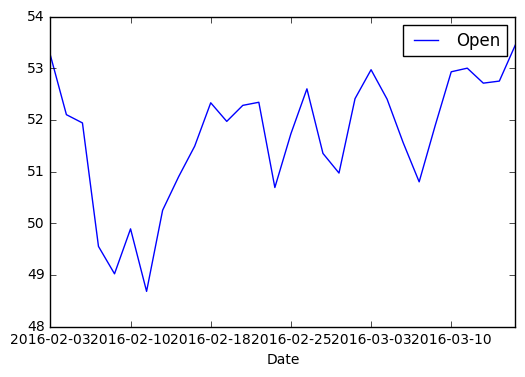

Microsoft announces the acquisition of LinkedIn at $26.2 billion ($60 per user).


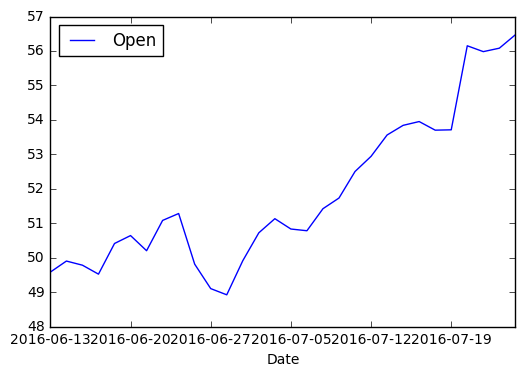

Microsoft Teams, a cloud-based team collaboration tool, is launched as part of Office 365


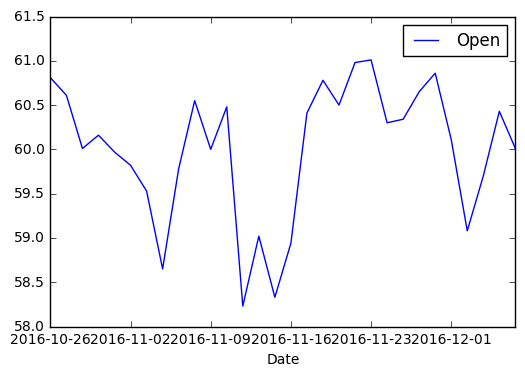

In [60]:
import matplotlib.pyplot as plt

n = 0
i = 0
indices = []
details = None
for row in combined_frame.iterrows():
    if n > 0 or str(row[1]['Event.type']) != 'nan':
        if str(row[1]['Event.type']) != 'nan':
            details = row[1]['Details']
        
        if n <= 0:
            n = 30
        else:
            n -= 1
            
        indices.append(i)
    
    if n == 1: 
        print(details)
        combined_frame.ix[indices][['Open']].plot()
        
        plt.show()
        
        n = 0
        indices = []
        
    i += 1
    
    
# plot_open = combined_frame[['Open']].plot()

In [40]:
news_count_frame

,Open,High,Count,Polarity,Date
0,-0.092686,-0.085812,0.057409,0.146771,2012-01-06
1,-0.082387,-0.087602,0.059789,0.083062,2012-01-09
2,-0.084763,-0.086608,0.076456,0.086008,2012-01-10
3,-0.094666,-0.089988,0.102647,0.106230,2012-01-11
4,-0.085952,-0.089193,0.109789,0.086940,2012-01-12
5,-0.084763,-0.084619,0.119313,0.079785,2012-01-13
6,-0.075455,-0.076665,0.114551,0.121443,2012-01-17
7,-0.077237,-0.081637,0.116932,0.090647,2012-01-18
8,-0.080208,-0.080941,0.126456,0.094290,2012-01-19
9,-0.067136,-0.054991,0.133599,0.108579,2012-01-20


['2012-01-26', '2012-01-27', '2012-01-28', '2012-01-29', '2012-01-30', '2012-01-31', '2012-02-01', '2012-02-02', '2012-02-03', '2012-02-04', '2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08', '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12', '2012-02-13', '2012-02-14', '2012-02-15', '2012-02-16', '2012-02-17', '2012-02-18', '2012-02-19', '2012-02-20', '2012-02-21', '2012-02-22', '2012-02-23', '2012-02-24']


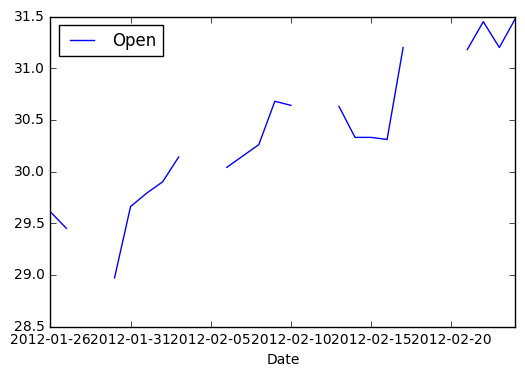

['2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24', '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28', '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06', '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10', '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20']


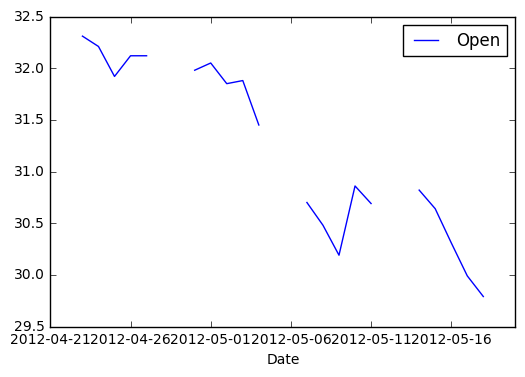

['2012-07-19', '2012-07-20', '2012-07-21', '2012-07-22', '2012-07-23', '2012-07-24', '2012-07-25', '2012-07-26', '2012-07-27', '2012-07-28', '2012-07-29', '2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03', '2012-08-04', '2012-08-05', '2012-08-06', '2012-08-07', '2012-08-08', '2012-08-09', '2012-08-10', '2012-08-11', '2012-08-12', '2012-08-13', '2012-08-14', '2012-08-15', '2012-08-16', '2012-08-17']


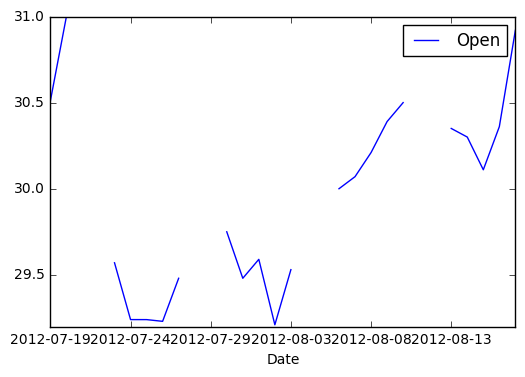

['2012-10-20', '2012-10-21', '2012-10-22', '2012-10-23', '2012-10-24', '2012-10-25', '2012-10-26', '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05', '2012-11-06', '2012-11-07', '2012-11-08', '2012-11-09', '2012-11-10', '2012-11-11', '2012-11-12', '2012-11-13', '2012-11-14', '2012-11-15', '2012-11-16', '2012-11-17', '2012-11-18']


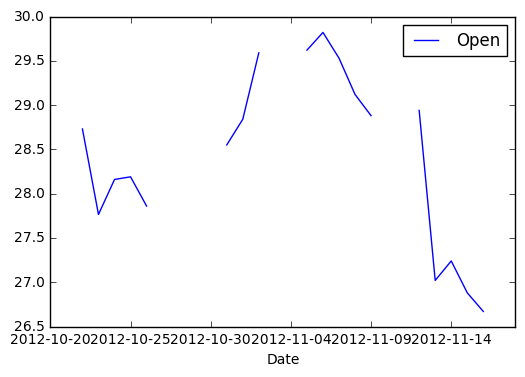

In [77]:
from_year = 2012
to_year = 2013
dates = ['-01-26', '-04-21', '-07-19', '-10-20']
for year in range(from_year, to_year):
    for date in dates:
        date = str(year) + date
        
        base = datetime.datetime.strptime(date, '%Y-%m-%d')
        numdays = 30
        indices = [str(base + datetime.timedelta(days=x))[:10] for x in range(0, numdays)]
        
        print(indices)
        combined_frame.ix[indices][['Open']].plot()
        plt.show()

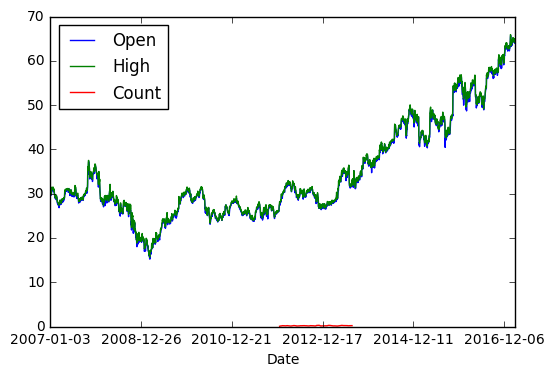

In [78]:
combined_frame.plot()